<a href="https://colab.research.google.com/github/maya-seo/Data-Analysis-with-Open-Source/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_8%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오픈소스 기반 데이터 분석 8강

# 데이터 분석 방법론

## 8-1 통계적 모형을 활용한 분석 (statsmodels)

In [2]:
import pandas as pd
import random
# statsmodels의 formula api 임포트
import statsmodels.formula.api as smf

## 난수 시드 설정
random.seed(1)

## 데이터 생성
X = list(range(1, 11))      #1-10까지의 리스트
y = [2*x + 1 + random.gauss(0, 1) for x in X]  #2*x + 1 + random.gauss(0, 1) 선형함수 기울기=2, 절편=1, random.gauss(평균, 표준편차(표준편차는 -1~1)) 가우시안 분포

## 데이터프레임 생성
data = pd.DataFrame({'X': X, 'y': y})

## OLS(최소 제곱법) 회귀 모델 생성 및 학습
## 'y'를 종속 변수로 하고 다른 특성(X)을 독립 변수로 사용
model = smf.ols(formula='y ~ X', data=data).fit()     #smf.ols(formula='y ~ X', data=data) 선형회귀 모형을 만들고(y(결과,예측)를 X(입력,원인)로 설명하는 선형 모델) fit()계산한다.

## 모델 요약 결과 출력
print(model.summary())      #학습된 회귀모델의 결과를 통계적으로 요약해서 보여줌,summary()회귀분석 통계 요약표(Regression Summary Table)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     345.0
Date:                Sun, 02 Nov 2025   Prob (F-statistic):           7.28e-08
Time:                        10:44:19   Log-Likelihood:                -12.020
No. Observations:                  10   AIC:                             28.04
Df Residuals:                       8   BIC:                             28.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7622      0.615      2.866      0.0

## 8-2 기계학습을 활용한 분석 (scikit-learn)

In [26]:
# scikit-learn의 앙상블(ensemble) 알고리즘 중 RandomForestClassifier 임포트
from sklearn.ensemble import RandomForestClassifier
# 모델 평가를 위한 데이터 분할(split) 함수 임포트
from sklearn.model_selection import train_test_split
# 모델의 정확도(accuracy)를 측정하는 함수 임포트
from sklearn.metrics import accuracy_score
# 예제 데이터셋(유방암 데이터) 로드 함수 임포트
from sklearn.datasets import load_breast_cancer

## 데이터 로드 및 분할
cancer = load_breast_cancer()         #이미 내포되어 있는 유방암 데이터를 함수로 불러옴
X, y = cancer.data, cancer.target     #유방암 데이터 중에서 data, target 정보만 불러옴 (data=입력데이터*환자의30가지진단수치,target=정답 0=악성,1=양성)

## 학습/테스트 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  #학습용/테스트용으로 무작위 분할train_test_split()함수, test_size테스트 30%, random_state=42 재현도의 정확성을 올리기 위해 숫자 42는 그저 자주 사용하는 숫자일 뿐 의미없음.

## 랜덤 포레스트 모델 생성 및 학습
model = RandomForestClassifier(n_estimators=100)  #n_estimators=100 몇개의 모델로 학습을 할 것인가
model.fit(X_train, y_train)      #fit()	X_train, y_train	모델 학습 (패턴을 배움), predict() + score()	X_test, y_test	모델 평가 (성능 확인)

## 예측 및 정확도 평가
y_pred = model.predict(X_test)      #X_train → 입력(문제), y_train → 정답(답안지), 모델 → “문제와 답의 관계를 학습하는 학생”
accuracy = accuracy_score(y_test, y_pred)   #X_test: 모델이 한 번도 보지 못한 입력(새로운 문제), y_pred: 모델이 스스로 예측한 정답, y_test: 실제 정답
print(accuracy)


0.9707602339181286


## 8-3 딥러닝을 활용한 분석 (tensorflow)

In [27]:
from sklearn.metrics import classification_report   #성능평가시 정확도,재현율,레퍼스코어 등 여러가지 관점으로 성능 다양한 측정으로 하는데 있어 리포트 형태로 모아둔 함수
# 딥러닝 분석을 위한 tensorflow 임포트
import tensorflow as tf

## CIFAR-10 데이터셋 로드 및 전처리
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

## MobileNetV2 기반 모델 구축
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(160, 160, 3))
base_model.trainable = False
model = tf.keras.Sequential([
    tf.keras.layers.Resizing(160, 160),
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(10)
])

## 모델 컴파일
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 모델 학습
model.fit(x_train, y_train, epochs=3, validation_split=0.2)

## 예측 및 성능 평가
y_pred = tf.argmax(model.predict(x_test), axis=1)
print("\nTest Accuracy:", model.evaluate(x_test, y_test, verbose=0)[1])
print("\nClassification Report:\n", classification_report(y_test, y_pred))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 53s 29ms/step - accuracy: 0.6961 - loss: 0.9004 - val_accuracy: 0.8084 - val_loss: 0.5542
Epoch 2/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.8197 - loss: 0.5179 - val_accuracy: 0.8207 - val_loss: 0.5290
Epoch 3/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.8371 - loss: 0.4732 - val_accuracy: 0.8179 - val_loss: 0.5266
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step

Test Accuracy: 0.8159999847412109

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1000
           1       0.95      0.87      0.91      1000
           2       0.81      0.74      0.77      1000
           3       0.57      0.82      0.67      1000
           4       0.75      0.80      0.77      1000
           5       0.89      0.61      0.72      1000
           6       0.88

## 8-4 EDA 예시

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

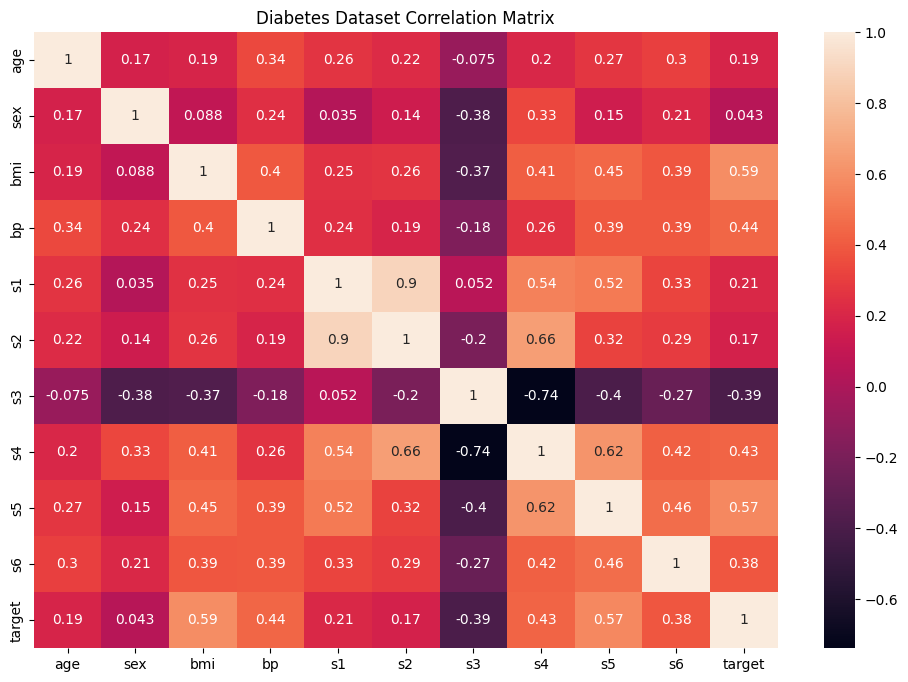

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes

## 당뇨병 데이터셋 로드 및 데이터프레임 생성
diabetes = load_diabetes()        #당뇨병 데이터를 불러옴
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)   #불러온 당뇨병 데이터에서 data(입력값)와 feature_names(열 이름) 을 이용해 DataFrame을 생성
df['target'] = diabetes.target      # diabetes에 포함된 target(정답값)을 DataFrame(df)의 ‘target’ 열로 추가함
                                    #열 이름(columns)을, diabetes 안에 이미 들어 있는 feature_names 리스트로 사용하겠다

## dataframe의 describe를 이용하여 기본 통계량 출력
print(df.describe())

## 상관 행렬 시각화
plt.figure(figsize=(12,8))

# dataframe의 각 열(변수)들 간의 상관 계수(correlation coefficient)를 계산하고 corr_matrix로 저장
corr_matrix = df.corr()   #corr()는 상관관계(correlation) 를 계산하는 함수로, df에 들어 있는 숫자형 변수(열)들 간의 상관관계를 계산하여 그 결과를 corr_matrix 변수에 저장한다.

# seaborn으로 corr_matrix를 heatmap으로 시각화
sns.heatmap(corr_matrix, annot=True)      #숫자값을 색으로 표현하는 시각화, 진한 색 → 상관이 강함 (±1에 가까움) 밝은 색 → 상관이 약함 (0 근처)
plt.title('Diabetes Dataset Correlation Matrix')
plt.show()


## 8-5 기술통계량 분석

In [5]:
import pandas as pd
import seaborn as sns

## 아이리스 데이터셋 로드
df = sns.load_dataset('iris')

# 기술 통계량
print("=== 기본 통계량 ===")
print(df.describe())

# 데이터 미리보기
print("\n=== 데이터 미리보기 ===")
print(df.head())

# 그룹별 통계정보
print("\n=== 품종별 평균값 ===")
print(df.groupby('species').mean())   #그룹의 평균값을 확인함

=== 기본 통계량 ===
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

=== 데이터 미리보기 ===
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

=== 품종별 평균값 ===
            sepal_length  

## 8-6 데이터 시각화 분석

In [6]:
# 한글 처리를 위한 matplotlib 설정 (1)

!sudo apt-get install -y fonts-nanum
!sudo fc-cache –fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (45.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 125080 files and direc

- 리소스 재시작

In [ ]:
# 한글 처리를 위한 matplotlib 설정 (2)

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

ValueError: Could not interpret value `sepal_lenght` for `y`. An entry with this name does not appear in `data`.

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44867 (\N{HANGUL SYLLABLE GGOC}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51086 (\N{HANGUL SYLLABLE IP}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missi

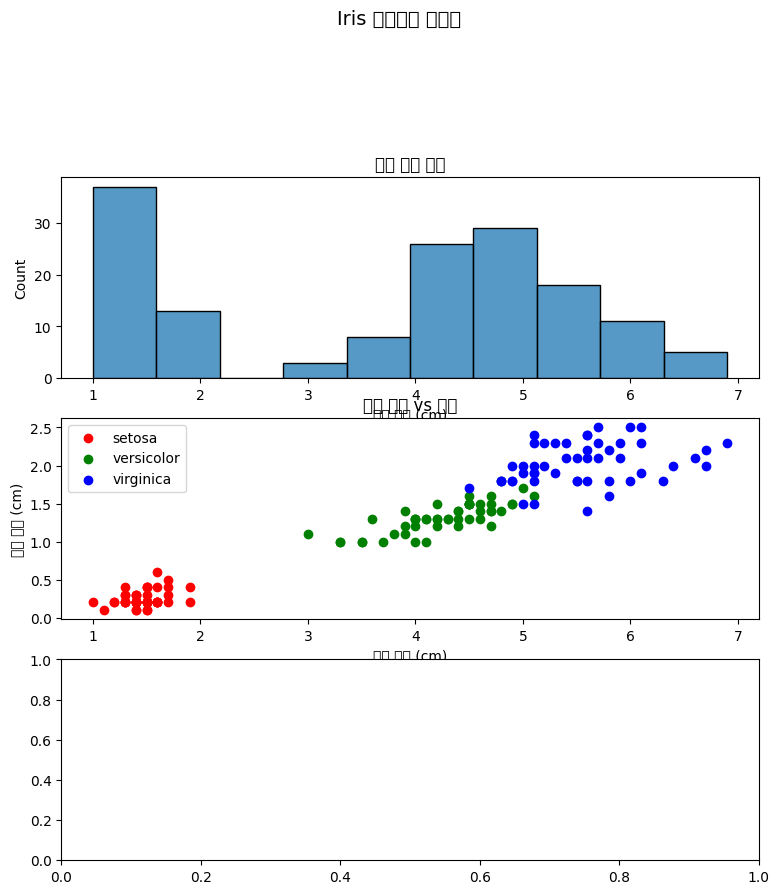

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

## 아이리스 데이터셋 로드
df = sns.load_dataset('iris')

## 서브플롯 설정
plt.figure(figsize=(9, 12))
plt.suptitle('Iris 데이터셋 시각화', y=1.02, fontsize=14)

## 첫 번째 서브플롯: 꽃잎 길이 분포 (히스토그램)
plt.subplot(4, 1, 1)
# seaborn을 이용하여 petal_length를 10개 구간으로 나누어 히스토그램 표시
sns.histplot(df['petal_length'], bins=10)
plt.title('꽃잎 길이 분포')
plt.xlabel('꽃잎 길이 (cm)')

## 두 번째 서브플롯: 꽃잎 길이 vs 너비 (산점도)
plt.subplot(4, 1, 2)
species_list = df['species'].unique()
colors = {'setosa':'red', 'versicolor':'green', 'virginica':'blue'}

for species in species_list:
    species_data = df[df['species'] == species]
    # matplotlib를 이용하여 길이, 넓이를 산점도로 표시
    plt.scatter(
        species_data['petal_length'], species_data['petal_width'],
        c=colors[species],label=species
    )
plt.title('꽃잎 길이 vs 너비')
plt.xlabel('꽃잎 길이 (cm)')
plt.ylabel('꽃잎 너비 (cm)')
plt.legend()

## 세 번째 서브플롯: 품종별 꽃받침 길이 (박스플롯)
plt.subplot(4, 1, 3)
# seaborn을 이용하여 품종 별 꽃받침 길이를 박스플롯으로 표시
sns.boxplot(x='species', y='sepal_lenght', data=df)
plt.title('품종별 꽃받침 길이 비교')
plt.xlabel('품종')
plt.ylabel('꽃받침 길이 (cm)')

## 네 번째 서브플롯: 숫자형 특성 간 상관관계 (히트맵)
plt.subplot(4, 1, 4)
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('숫자형 특성 간 상관관계')

## 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show()

## 8-7 자동화된 EDA 도구

In [1]:
!pip install ydata_profiling

In [4]:
import seaborn as sns
from ydata_profiling import ProfileReport

## 아이리스 데이터셋 로드
df = sns.load_dataset('iris')

## 데이터 프로파일링 보고서 생성
profile = ProfileReport(df, title="보고서!")

## HTML 파일로 보고서 저장
profile.to_file('report.html')

## 보고서 표시 (Jupyter Notebook 환경에서 보고서가 바로 표시됨)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 5/5 [00:00<00:00, 70.31it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]